In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDb dataset (top 10,000 most frequent words)
vocab_size = 10000
max_length = 200  # Max review length (truncate/pad to this)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

17464789/17464789 [==============================] - 10s 1us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(units=64, return_sequences=False),  # LSTM layer
    Dense(units=1, activation='sigmoid')     # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 70s 214ms/step - loss: 0.5771 - accuracy: 0.6866 - val_loss: 0.5371 - val_accuracy: 0.7842
Epoch 2/5
313/313 [==============================] - 66s 213ms/step - loss: 0.5743 - accuracy: 0.7128 - val_loss: 0.5862 - val_accuracy: 0.7062
Epoch 3/5
313/313 [==============================] - 78s 250ms/step - loss: 0.5178 - accuracy: 0.7754 - val_loss: 0.4957 - val_accuracy: 0.7884
Epoch 4/5
313/313 [==============================] - 86s 276ms/step - loss: 0.5578 - accuracy: 0.6996 - val_loss: 0.5731 - val_accuracy: 0.7162
Epoch 5/5
313/313 [==============================] - 84s 267ms/step - loss: 0.4408 - accuracy: 0.8034 - val_loss: 0.4563 - val_accuracy: 0.8066


In [4]:
# Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 [==============================] - 43s 55ms/step - loss: 0.4486 - accuracy: 0.8132
Test Accuracy: 0.8132


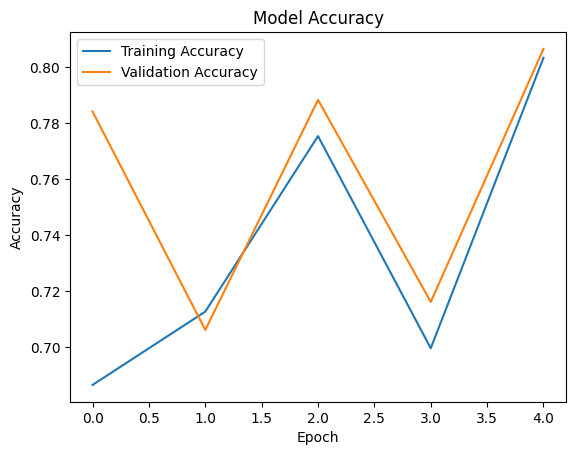

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# Example: Predict sentiment for a custom review
word_index = imdb.get_word_index()
new_review = "this movie was amazing and fun"
# Convert to sequence of integers
sequence = [word_index.get(word, 2) for word in new_review.split()]  
sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
prediction = model.predict(sequence)[0][0]
print("Positive" if prediction > 0.5 else "Negative")

1/1 [==============================] - 1s 545ms/step
Positive
